In [2]:
%matplotlib inline

In [62]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
# files to load in as DataFrames
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [64]:
# Step 1: Import CSVs into DataFrames using pandas .read_csv()
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [65]:
# preview City DataFrame
#city_data_df

In [66]:
# preview Ride DataFrame
#ride_data_df

In [67]:
# TO-DO: inspect DataFrame data & prep to merge

In [68]:
# inspect City DataFrame Data

#city_data_df.count() # count of columns that are not null 
#city_data_df.isnull().sum() # get count of null values (should be 0)
#city_data_df.dtypes() # check each column's data type

In [69]:
# inspect Ride DataFrame Data

#ride_data_df.count() # count of columns that are not null
#ride_data_df.isnull().sum() # get count of null values (should be 0)
#ride_data_df.dtypes # check each column's data type

In [70]:
# Step 2: Merge City and Ride DataFrames using pandas .merge()
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# preview new merged DataFrame to confirm successful merge
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [71]:
# CREATE A BUBBLE CHART WITH PYBER RIDE SHARING DATA

In [73]:
# PREPARE DATA FOR BUBBLE CHART
# create a new DataFrame for each city type 
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

# preview new DataFrames. they should only have one city type each
#urban_cities_df.head()
#suburban_cities_df.head()
#rural_cities_df.head()

In [74]:
# get the number of rides for each city type using .groupby() and .count()
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [75]:
# get average fare for each city type using .groupby() and .mean()
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [76]:
# get the average number of drivers for each city type using .groupby() and .mean()
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

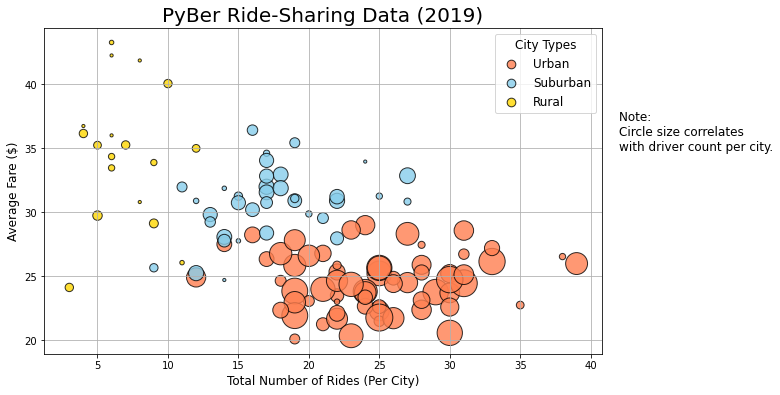

In [122]:
# BUILD A SCATTER PLOT FOR EACH CITY TYPE USING pyplot .scatter()

# make it bigger
plt.subplots(figsize=(10, 6))

# urban city data
plt.scatter(urban_ride_count, 
            urban_average_fare, 
            s = 10 * urban_driver_count, 
            c = "coral", 
            edgecolor = "black", 
            linewidths = 1, 
            alpha = 0.8, 
            label = "Urban")

# suburban city data
plt.scatter(suburban_ride_count,
            suburban_average_fare,
            s = 10 * suburban_driver_count,
            c = "skyblue",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Suburban")

# rural city data
plt.scatter(rural_ride_count,
            rural_average_fare,
            s = 10 * rural_driver_count,
            c = "gold",
            edgecolor = "black",
            linewidths = 1,
            alpha = 0.8,
            label = "Rural")

# title & formatting
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# create a legend
lgnd = plt.legend(fontsize = "12", # fontsize of the actual legend key
                  mode = "Expanded",
                  scatterpoints = 1,
                  loc = "best",
                  title = "City Types")

lgnd.legendHandles[0]._sizes = [75] # change size of the first handle (urban) using legendHandles[]._sizes
lgnd.legendHandles[1]._sizes = [75] # change size of the second handle (suburban) using legendHandles[]._sizes
lgnd.legendHandles[2]._sizes = [75] # change size of the third handle (rural) using legendHandles[]._sizes

lgnd.get_title().set_fontsize(12) # fontsize of the legend title

# add text label about circle size using .txt()
plt.text(42, 35, 
         "Note: \nCircle size correlates \nwith driver count per city.", 
         fontsize = "12", 
         wrap = True)

# save the scatterplot using .savefig()
plt.savefig("Analysis/Fig1.png",
            bbox_inches = "tight") # to make sure text isn't cut off in .png export

# show the scatter plot
plt.show()